## Prediction of Graduate Admission
### Problem Statement: 
#### Use classification technique for prediction of Graduate Admissions from an Indian perspective.
### Dataset description: 
#### This dataset helps students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.
#### The dataset contains several parameters which are considered important during the application for Masters Programs.The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )



## 1. Load the Data and Analysis Variables

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df_columns = df.columns.tolist()
print(df_columns)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


* To make reading easier rewrite the column name with lower case
* There is a space after "Chance of Admit " Column


In [6]:
df = df.rename(columns = {'Serial No.': 'serial_no', 'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating', 'Chance of Admit ':'Chance_of_Admit'})

In [7]:
df.head(20)


,serial_no,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
df.dtypes

serial_no              int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [9]:
df.shape

(500, 9)

In [10]:
df.isnull().sum()

serial_no            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

##### 1. The variable in the data set are Numerical
##### 2. The data set contain 500 instances with 9 attributes
##### 3. Dataset has no missing values
The "Chance_of_Admit" column is the outcome variable and takes value between 0 and 1. 1 represents that the subject is admitted to the program while 0 represents rejected applications. Problem can be classified as a binary classification problem where outcome probability refers to the probability of subject being admitted to the program. Since only chance of admission is provided, the analysis will continue as a prediction analysis of chance of admission.


## Data Exploration

In [11]:
df.describe()

,serial_no,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

The mean, or average.
50% aka Median it is very import to understand Skeweness of the Data
The standard deviation, or how spread out the data is.
The minimum and maximum value of each column
The number of items that fall within the first, second, and third percentiles.
Second, let us analyze the distribution of subjects' chance of admit in the data. Let us see how rating affects chance of admission:

In [12]:
df.groupby('University_Rating').mean()

,serial_no,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admit
University_Rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [13]:
df[df['Chance_of_Admit']>0.82].groupby('Chance_of_Admit').mean()

,serial_no,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
Chance_of_Admit,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


### Several observations:
* Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
* Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.
* Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%

## Data Visualization

### Histogram of Admission Chance
Let us visualize our data to get a much clearer picture of the data and the significant features.

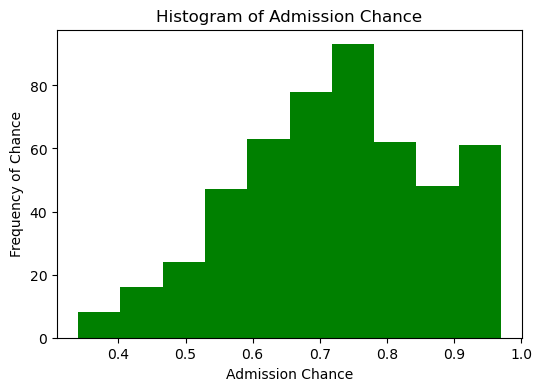

In [14]:

plt.figure(figsize=(6,4))
plt.hist(df['Chance_of_Admit'],bins=10,color="green")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

Histogram shows us that 'chance of admission' column is well distributed in data.

## Line Plot for Research Output and The Chance of Admission

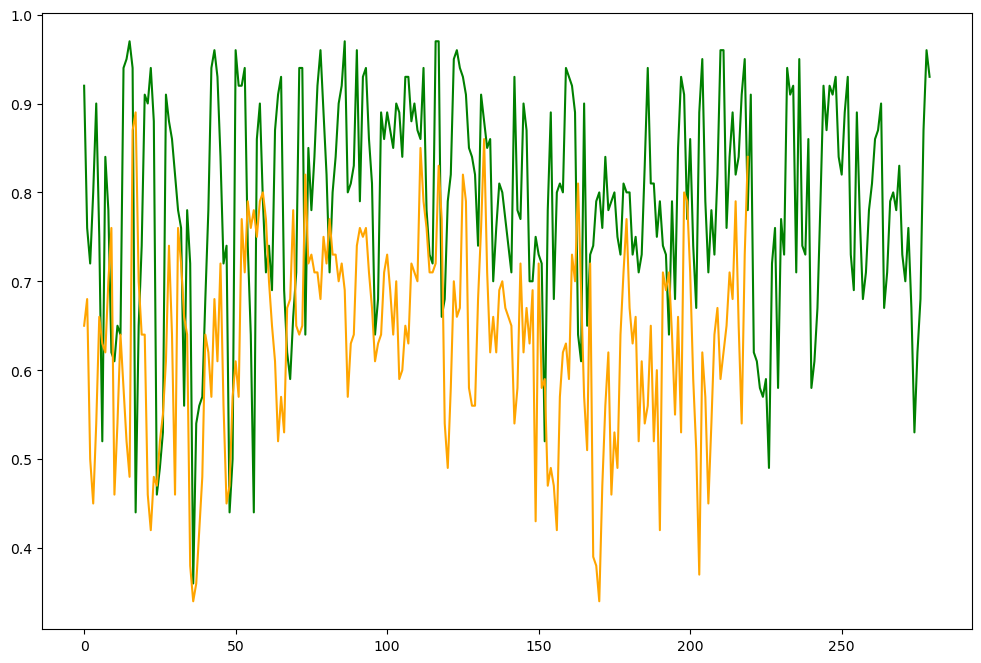

In [15]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['Research']==1])), df[df['Research']==1]['Chance_of_Admit'], color='green')
plt.plot(range(len(df[df['Research']==0])), df[df['Research']==0]['Chance_of_Admit'], color='orange')
plt.show()

The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.



## Scatter Plot of University Rating and The Chance of Admission


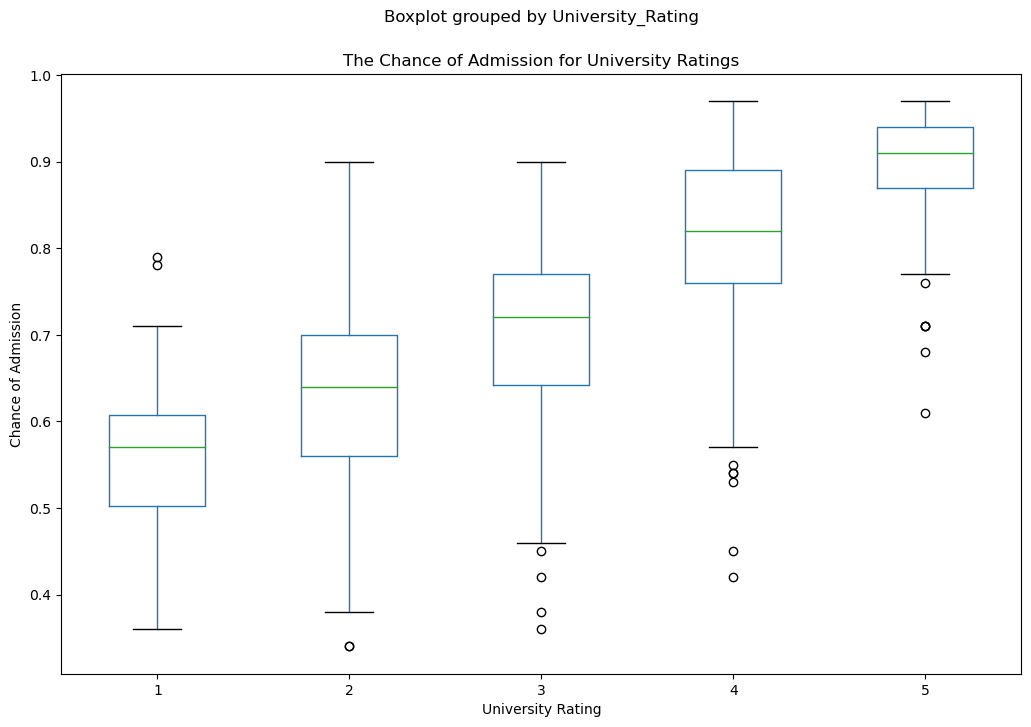

In [16]:
df.boxplot(column='Chance_of_Admit',by='University_Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of higher rated (5) universities.

## Histogram of Numeric Variables

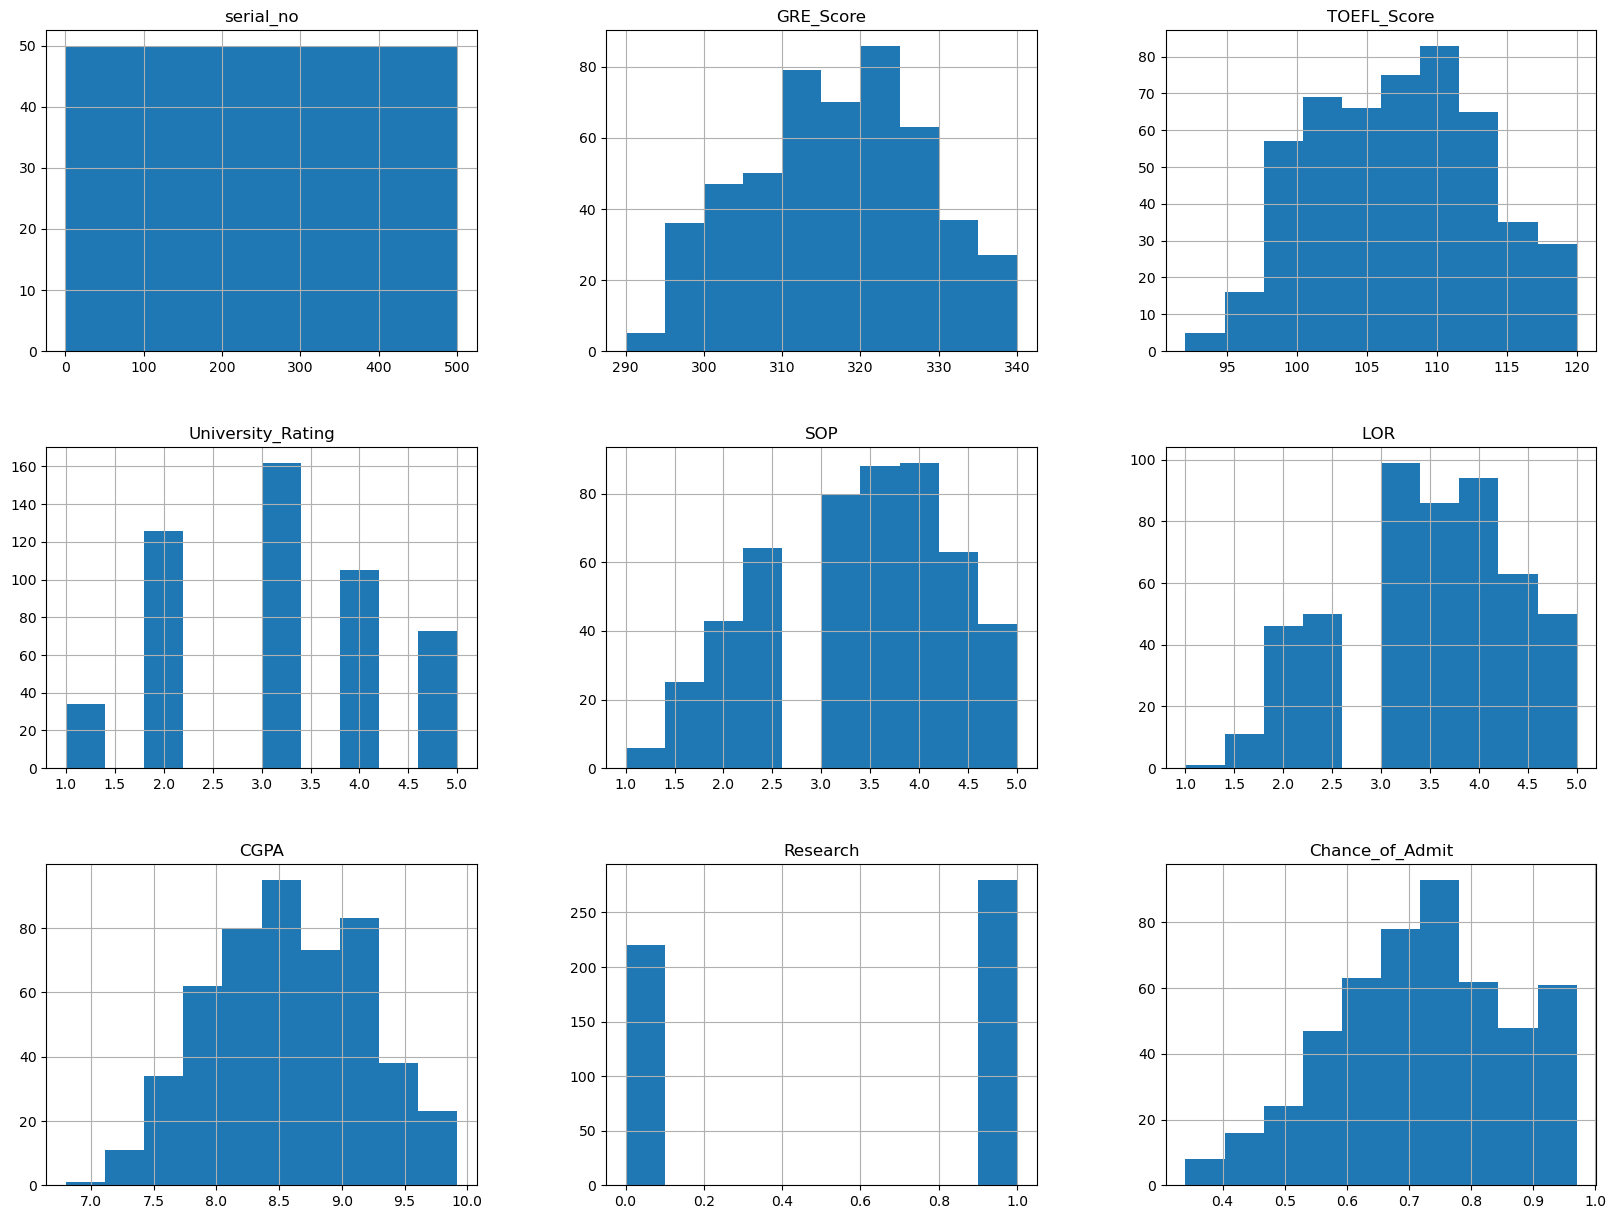

In [17]:
df.hist(bins=10, figsize=(20,15))
plt.show()

## Data Preperation
As it can be seen from Data Preprocessing section above, graduate admission data is only include numerical variables. Hence, only the following steps should be implemented before model devolopment:

* The outcome variable is 'Chance_of_Admit', and all other features are predictors.
* 'serial_no' variable should be dropped from dataset since it only indicator of the instances (means ID Column)

In [18]:
df.drop(['serial_no'],axis=1,inplace=True)


In [19]:
var=df.columns.values.tolist()
y=df['Chance_of_Admit']
x=[i for i in var if i not in ['Chance_of_Admit']]
x=df[x]

Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
y


: 